# 분산투자의 한계

분산투자가 시장이 붕괴할 때 도움이 되지 않는 이유는 무엇일까요?

한 가지 이유는 시장이 하락함에 따라 자산 간의 상관관계가 증가하기 때문입니다.

이러한 현상을 데이터에서 확인할 수 있는지 한 번 살펴보겠습니다.

이전에 사용했던 산업 데이터셋를 로드해 보겠습니다.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import port_opt_toolkit as potk

ind_return = potk.get_ind_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 시총가중 포트폴리오 구현하기

대부분의 시장 지수는 시가 총액(Market Capitalization)이라고 하는 자산의 크기에 따라 가중치를 부여하여 구성됩니다.

여기서는 30개의 산업 포트폴리오에서 시가총액 가중 지수를 구성해 보겠습니다.

우리는 각 산업에 대해서 각 산업의 종목 수와 산업의 평균 시가 총액에 대한 데이터를 얻을 수 있습니다. 따라서 평균 시가 총액에 회사 수를 곱하여 산업별 총 시가 총액을 얻을 수 있습니다. 그런 다음 해당 산업의 시가 총액에 비례하여 각 산업 포트폴리오에 가중치를 부여하게 됩니다.

이제 산업 규모와 평균 기업 수에 대한 데이터를 로드해 보겠습니다.

```python
def get_ind_nfirms():
    """
    Load and format the Ken French 30 Industry Portfolios Average number of Firms
    """
    ind = pd.read_csv("data/ind30_m_nfirms.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():
    """
    Load and format the Ken French 30 Industry Portfolios Average size (market cap)
    """
    ind = pd.read_csv("data/ind30_m_size.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind
```

In [9]:
import pandas as pd

def get_ind_nfirms():
    """
    Load and format the Ken French 30 Industry Portfolios Average number of Firms
    """
    ind = pd.read_csv("data/ind30_m_nfirms.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():
    """
    Load and format the Ken French 30 Industry Portfolios Average size (market cap)
    """
    ind = pd.read_csv("data/ind30_m_size.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

ind_nfirms = get_ind_nfirms()
ind_size = get_ind_size()


In [10]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,14,...,5,3,7,6,75,2,33,6,13,4
1926-08,43,3,16,7,2,8,12,7,17,14,...,5,3,7,6,75,2,33,6,13,4
1926-09,43,3,16,7,2,8,12,7,17,14,...,5,3,7,6,75,2,33,6,13,4
1926-10,43,3,16,7,2,8,12,7,17,14,...,5,3,7,6,75,2,33,6,13,4
1926-11,43,3,16,7,2,8,12,7,17,14,...,5,3,7,6,75,2,33,6,13,4


In [11]:
ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,5.78,...,350.36,13.60,56.70,35.35,66.46,1.19,46.65,10.82,18.03,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,5.79,...,353.27,14.75,57.74,37.86,67.52,0.90,46.57,11.00,18.01,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.25,...,360.96,15.05,59.61,36.82,70.51,0.95,46.11,10.94,18.77,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.36,...,364.16,15.30,59.52,34.77,70.34,0.88,46.15,10.80,18.41,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.38,...,363.74,14.89,58.74,32.80,68.29,0.74,45.03,10.33,17.38,23.94


In [12]:
ind_return.shape

(1143, 30)

In [13]:
ind_size.shape

(1143, 30)

In [14]:
ind_nfirms.shape

(1143, 30)

In [15]:
ind_mktcap = ind_nfirms * ind_size

In [16]:
ind_mktcap.shape

(1143, 30)

이제 우리는 월별 시가 총액 데이터가 있기 때문에 모든 산업을 합산하여 전체 시가 총액을 계산할 수 있습니다.

In [17]:
total_mktcap = ind_mktcap.sum(axis=1)

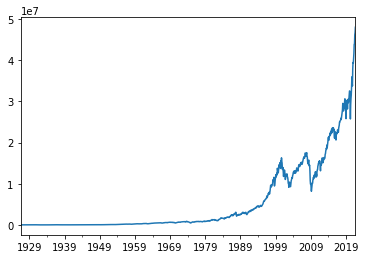

In [18]:
total_mktcap.plot()

시간이 지남에 따라 시장의 크기가 성장하는 것을 확인할 수 있습니다.

이제 다음과 같이 각 산업별 시총 비중을 계산해보겠습니다.

In [19]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")

모든 산업들의 시총 가중치를 전부 합하게 되면 1이 되어야 합니다. 이를 확인해보겠습니다.

여기서의 값들은 부동 소수점 숫자이기 때문에 `== 1.0`을 사용하여 합이 1인지 테스트하는 것보다는 대신 총합이 1에 매우 가까운지를 확인합니다.

In [20]:
all(abs(ind_capweight.sum(axis="columns") - 1) < 1E-10)

True

철강 섹터와 금융 섹터의 시총 비중 흐름 추이를 살펴보겠습니다.

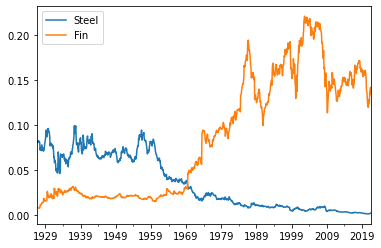

In [21]:
ind_capweight[["Steel", "Fin"]].plot()

# 시가총액 지수 만들기

시장 지수를 만드는 한 가지 방법은 가중치가 매 기간의 목표 가중치로 리밸런싱되는 포트폴리오를 구축하는 것입니다. 실제로 가중치는 시간이 지남에 따라 변화할 수 있지만 여기서는 논의를 보다 단순화해서 구현을 해보겠습니다.

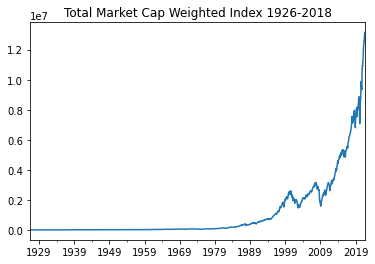

In [22]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")
total_market_index = potk.drawdown(total_market_return).Wealth
total_market_index.plot(title="Total Market Cap Weighted Index 1926-2018")

앞에서 구현한 것들은 전부 하나의 함수 안에 집어넣습니다.

```python
def get_total_market_index_returns():
    """
    Load the 30 industry portfolio data and derive the returns of a capweighted total market index
    """
    ind_nfirms = get_ind_nfirms()
    ind_size = get_ind_size()
    ind_return = get_ind_returns()
    ind_mktcap = ind_nfirms * ind_size
    total_mktcap = ind_mktcap.sum(axis=1)
    ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
    total_market_return = (ind_capweight * ind_return).sum(axis="columns")
    return total_market_return
```

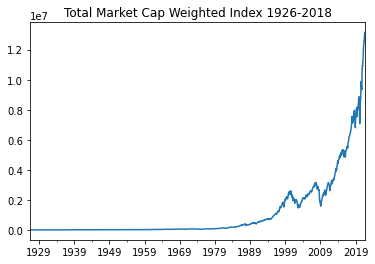

In [23]:
total_market_return = potk.get_total_market_index_returns()
total_market_index = potk.drawdown(total_market_return).Wealth
total_market_index.plot(title="Total Market Cap Weighted Index 1926-2018")

# 롤링 윈도우 (Rolling Windows)

여기서는 과거 36개월 동안의 수익률을 롤링 윈도우를 구성해 보겠습니다. 판다스는 롤링 윈도우에 대한 직접적인 지원을 하고 있으며, 윈도우를 통해 수익률을 집계할 수 있습니다. 후행 36개월 기간 동안의 평균 수익률을 계산해 보겠습니다.

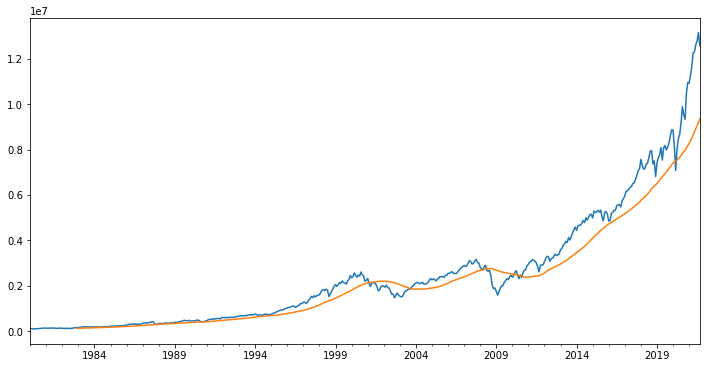

In [24]:
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot()

우리가 원하는 것은 평균 수익률이 아니라 과거 3년치에 대한 복리 수익률입니다. 따라서 이를 위해서는 `mean()` 대신 자체적으로 함수를 작성해야 합니다.

윈도우가 하나씩 움직일 때마다 새로운 부분 데이터프레임이 새 값을 생성하는데 사용됩니다. `.mean`과 같은 데이터프레임의 내장 메소드 중 하나를 사용하거나 `.aggregate` 메소드를 사용하여 해당 창에 속하는 모든 행의 각 열에 고유한 함수를 적용할 수 있습니다.

후행 36개월 연간 수익률의 시계열과 동일한 타임프레임 상에서의 주식 간 평균 상관 관계를 생성해 보겠습니다.

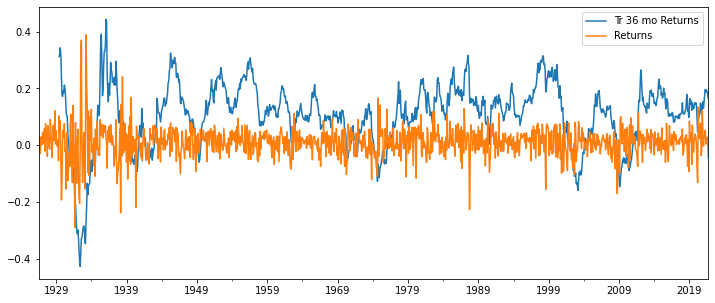

In [26]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(potk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,5), label="Tr 36 mo Returns", legend=True)
total_market_return.plot(label="Returns", legend=True)

# 롤링 상관계수 (Rolling Correlations) - 멀티인덱스와 `.groupby`

다음으로 동일한 후행 3년의 기간 동안 모든 산업 간의 평균 상관 관계를 살펴보고자 합니다.

36개월 기간 동안 시간 흐름에 따른 상관 관계의 시계열을 구성하는 것으로 시작하겠습니다.

In [27]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2021-09 Whlsl  0.831786  0.790381  0.600746  0.768562  0.878799  0.813573   
        Rtail  0.727412  0.733798  0.455157  0.746726  0.595888  0.759799   
        Meals  0.779098  0.768639  0.414542  0.696737  0.724120  0.811953   
        Fin    0.813595  0.718678  0.616204  0.812746  0.904620  0.735518   
        Other  0.825412  0.770507  0.570094  0.729274  0.785328  0.736892   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2021-09 Whlsl  0.853781  0.773534  0.926440  0.793469  ...  0.914558   
        Rtail  0.673684  0.798063  0.770075  0.457783  ...  0.708759   
        Meals  0.727374  0.642064  0.771010  0.655485  ...  0.858331   
        Fin    0.797311  0.693258  0.862625  0.805435  ...  0.918070   
        Other  0.748841  0.657495  0.817257  0.705419  ...  0.869213   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2021-09 Whlsl  0.837281  0.802324  0.896825  0.920807  1.000000  0.767694   
        Rtail  0.880980  0.867214  0.777641  0.738073  0.767694  1.000000   
        Meals  0.778605  0.652631  0.735618  0.795237  0.819641  0.659219   
        Fin    0.814021  0.734393  0.826136  0.902817  0.948794  0.672366   
        Other  0.744740  0.725245  0.820279  0.907722  0.888293  0.686659   

                  Meals       Fin     Other  
2021-09 Whlsl  0.819641  0.948794  0.888293  
        Rtail  0.659219  0.672366  0.686659  
        Meals  1.000000  0.842451  0.770581  
        Fin    0.842451  1.000000  0.888839  
        Other  0.770581  0.888839  1.000000  

[5 rows x 30 columns]

여기서 생성된 것은 멀티레벨 인덱스(MultiLevel Index)가 있는 데이터프레임입니다. 첫 번째 레벨은 날짜이고 두 번째 레벨은 산업 이름입니다. 인덱스 레벨 자체에 이름을 지정하면 이를 더 쉽게 확인할 수 있습니다.

In [28]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2021-09 Whlsl     0.831786  0.790381  0.600746  0.768562  0.878799  0.813573   
        Rtail     0.727412  0.733798  0.455157  0.746726  0.595888  0.759799   
        Meals     0.779098  0.768639  0.414542  0.696737  0.724120  0.811953   
        Fin       0.813595  0.718678  0.616204  0.812746  0.904620  0.735518   
        Other     0.825412  0.770507  0.570094  0.729274  0.785328  0.736892   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2021-09 Whlsl     0.853781  0.773534  0.926440  0.793469  ...  0.914558   
        Rtail     0.673684  0.798063  0.770075  0.457783  ...  0.708759   
        Meals     0.727374  0.642064  0.771010  0.655485  ...  0.858331   
        Fin       0.797311  0.693258  0.862625  0.805435  ...  0.918070   
        Other     0.748841  0.657495  0.817257  0.705419  ...  0.869213   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2021-09 Whlsl     0.837281  0.802324  0.896825  0.920807  1.000000  0.767694   
        Rtail     0.880980  0.867214  0.777641  0.738073  0.767694  1.000000   
        Meals     0.778605  0.652631  0.735618  0.795237  0.819641  0.659219   
        Fin       0.814021  0.734393  0.826136  0.902817  0.948794  0.672366   
        Other     0.744740  0.725245  0.820279  0.907722  0.888293  0.686659   

                     Meals       Fin     Other  
date    industry                                
2021-09 Whlsl     0.819641  0.948794  0.888293  
        Rtail     0.659219  0.672366  0.686659  
        Meals     1.000000  0.842451  0.770581  
        Fin       0.842451  1.000000  0.888839  
        Other     0.770581  0.888839  1.000000  

[5 rows x 30 columns]

롤링 상관관계를 계산하려면 동일한 날짜에 대한 모든 행을 그룹화한 다음 데이터프레임의 모든 항목에 대해 평균을 계산해야 합니다.

각 열의 평균이 아닌 데이터프레임 상 모든 값의 평균을 계산해야 합니다. 이를 위해 평균의 평균을 계산할 수도 있지만 상관계수 행렬에서 자체 함수를 호출하는 것이 더 간단합니다.

이것을 계산하는 함수를 만들 수도 있지만, 단순한 일회성 함수이기 때문에 이름이 없는 `lambda` 함수를 제공하는 것이 더 쉬운 경우가 많습니다. 이것은 표준 판다스의 기능 중 하나입니다.

다음과 같이 코드를 구현하면 됩니다.

In [29]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cormat: cormat.values.mean())

이제 우리는 후행 36개월의 평균 상관관계와 수익률을 동시에 그려볼 수 있습니다.

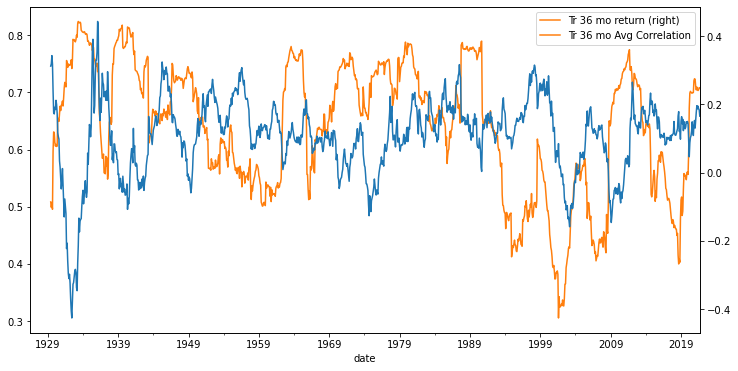

In [30]:
tmi_tr36rets.plot(secondary_y=True, legend=True, label="Tr 36 mo return", figsize=(12,6))
ind_tr36corr.plot(legend=True, label="Tr 36 mo Avg Correlation")

In [31]:
tmi_tr36rets.corr(ind_tr36corr)

-0.2770029148867415

이 두 시계열 데이터는 어느 정도의 음의 상관관계를 가지고 있습니다. 이러한 결과는 우리가 분산투자가 가장 필요한 순간 분산투자의 효과를 누릴 수 없게 되는 이유를 어느 정도 설명해줍니다. 시장이 하락하게 되면 자산들의 상관계수는 높아지는 경향이 있고 이는 분산투자의 가치를 퇴색시키게 됩니다.

다음 시간에는 이러한 분산투자의 한계를 경감시키고자 보험을 사용해서 분산투자의 단점을 보완하는 방법을 살펴보겠습니다.